## T2.3: Scraping de Web Service de Red Eléctrica
### Autor: Ralphy Núñez Mercado

<p>
Fai unha función en Python que descargue a información dun día dado en: es / mercados / precios-mercados-tiempo-real.  

Imprime por pantalla os prezos de cada franxa horaria por megavatio/hora e indica cales son:

- As dúas horas máis baratas.  
- As dúas horas máis caras.  
- A media do día.  
- Fai unha gráfica de barras con MatPlotLib.
</p>

### ⬇️📦 Mágias para la instalación de los paquetes.

In [ ]:
%conda install -y pandas # o  %pip install pandas
%conda install -y requests #o %pip install requests
%conda install -y matplotlib # o %pip install matplotlib
%conda install -y numpy # o %pip install numpy

### ⬇️📦 Importación de los paquetes.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 📨 Hacer request a la api para conseguir los datos y formatear los datos para poder utilizarlos de una manera óptima.  
<a href="https://www.ree.es/es/datos/apidatos">API | Red Eléctrica</a>

In [11]:
def buscar_precios(fecha_inicio, fecha_fin):
    link = f"https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real?start_date={fecha_inicio}T00:00&end_date={fecha_fin}T00:00&time_trunc=hour"
    return link


precios_json = requests.get(buscar_precios("2025-01-27","2025-01-28")).json()

# Extraer los datos de 'included'
datos = precios_json['included'][0]['attributes']['values']

# Convertir los datos en un dataframe
df_precios = pd.DataFrame(datos)

df_precios

,value,percentage,datetime
0,75.24,0.862448,2025-01-27T00:00:00.000+01:00
1,65.24,0.948807,2025-01-27T01:00:00.000+01:00
2,66.83,0.949964,2025-01-27T02:00:00.000+01:00
3,70.16,0.952226,2025-01-27T03:00:00.000+01:00
4,66.13,0.990267,2025-01-27T04:00:00.000+01:00
5,67.99,0.950776,2025-01-27T05:00:00.000+01:00
6,70.01,0.909221,2025-01-27T06:00:00.000+01:00
7,89.22,0.736990,2025-01-27T07:00:00.000+01:00
8,126.50,0.724887,2025-01-27T08:00:00.000+01:00
9,122.56,0.740007,2025-01-27T09:00:00.000+01:00


### 🔢  Obtener las dos horas más baratas.

In [12]:
horas_mas_baratas =  df_precios.sort_values(by='value')

horas_mas_baratas.head(2)

,value,percentage,datetime
24,53.78,0.938569,2025-01-28T00:00:00.000+01:00
1,65.24,0.948807,2025-01-27T01:00:00.000+01:00


### 🔢 Obtener las dos horas más caras.

In [13]:
horas_mas_caras = df_precios.sort_values(by='value', ascending=False) 

horas_mas_caras.head(2)

,value,percentage,datetime
19,198.78,0.788340,2025-01-27T19:00:00.000+01:00
20,182.79,0.817158,2025-01-27T20:00:00.000+01:00


### 🔢 Calcular la media del precio durante el día.

In [14]:
media = df_precios['value'].mean()

print(f"Media de los precios durante el día: {media} €.")

Media de los precios durante el día: 110.998 €.


### 🔄 Convertir la columna 'datetime' a formato datetime.

In [15]:
df_precios['datetime'] = pd.to_datetime(df_precios['datetime'])

### 📈 Graficar los datos con MatPlotLib.

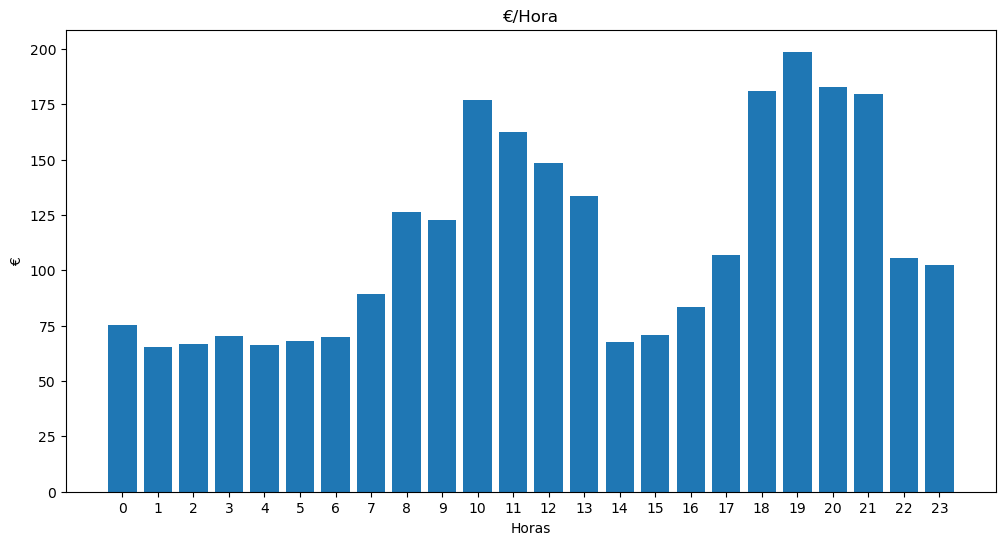

In [16]:
# Por si acaso, ordenar el dataframe por horas.
df_precios = df_precios.sort_values(by='datetime')

x = pd.to_datetime(df_precios["datetime"])
y = df_precios['value']

plt.figure(figsize=(12,6))
plt.xlabel('Horas')
plt.ylabel('€')
plt.title("€/Hora")
plt.xticks(np.arange(0, 24, step=1))
plt.bar(x.dt.hour,y)
plt.show()

